In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline
sns.set(style='white', context='notebook',palette='deep')

In [38]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X = df.drop(['label'],axis=1)
Y = df['label']

In [40]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

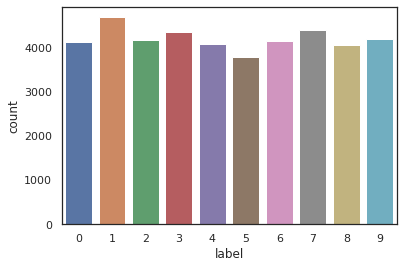

In [41]:
sns.countplot(Y)

In [42]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [43]:
X = X / 255.0
test = test / 255.0
X = np.array(X)
test = np.array(test)
print(type(X))

<class 'numpy.ndarray'>


In [44]:
X2 = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
print(X2)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [45]:
Y2 = to_categorical(Y, num_classes=10)
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [46]:
[X_train, X_test, Y_train, Y_test] = train_test_split(X2, Y2, test_size = 0.1, random_state = 3)

In [47]:
print(X_train.shape[:])
print(Y_train.shape[:])
print(X_test.shape[:])
print(Y_test.shape[:])

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


In [116]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),),
    tf.keras.layers.Dropout(0.50),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.50),
    tf.keras.layers.Dense(10, activation='softmax'),
    
])

optimizer = RMSprop(lr=0.0008,rho=0.912, epsilon=1e-08,decay=0.0001)

model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 64)        

In [112]:
learning_rate_reduction = ReduceLROnPlateau(moniter='val_acc', patience = 3,verbose=2, factor=0.5, min_lr=0.00001)

In [140]:
epochs = 3
batch_size = 78

In [108]:
datagen = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    rotation_range = 9,
    zoom_range = 0.15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)
datagen.fit(X_train)

In [144]:
history1 = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                   validation_data = (X_test, Y_test), verbose=2)

Epoch 1/3
485/485 - 4s - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.0234 - val_accuracy: 0.9933
Epoch 2/3
485/485 - 4s - loss: 0.0188 - accuracy: 0.9948 - val_loss: 0.0223 - val_accuracy: 0.9921
Epoch 3/3
485/485 - 4s - loss: 0.0196 - accuracy: 0.9950 - val_loss: 0.0209 - val_accuracy: 0.9938


In [145]:
history2 = model.fit_generator(datagen.flow(X_train, Y_train ,batch_size=batch_size),
                             epochs=epochs, 
                             validation_data = (X_test, Y_test),
                             verbose = 2, 
                             steps_per_epoch = X_train.shape[0]//batch_size,
                             callbacks = [learning_rate_reduction])

Epoch 1/3
484/484 - 13s - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.0249 - val_accuracy: 0.9948 - lr: 9.0000e-05
Epoch 2/3
484/484 - 14s - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.0258 - val_accuracy: 0.9943 - lr: 9.0000e-05
Epoch 3/3
484/484 - 13s - loss: 0.0320 - accuracy: 0.9917 - val_loss: 0.0266 - val_accuracy: 0.9943 - lr: 9.0000e-05


TypeError: 'Text' object is not callable

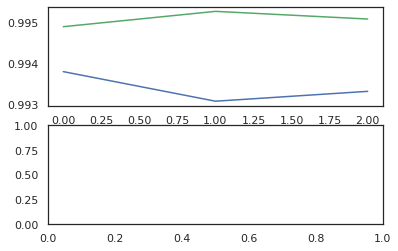

In [147]:
figure , ax = plt.subplots(2,1)
ax[0].plot(history.history['accuracy'], color='g', label = 'Training_accuracy')
ax[0].plot(history.history['val_accuracy'], color='b',label = 'validation_accuracy')

ax[0].legend(loc='best', shadow = True)

ax[1].plot(history.history['loss'], color = 'g', label = 'Training_loss')
ax[1].plot(history.history['val_loss'], color = 'b' , label = 'validation_loss')
ax[1].legend(loc='best', shadow = False)